<a href="https://colab.research.google.com/github/cuzmyk/data_mining/blob/main/pr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [2]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2024-10-10 16:34:22--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 142.251.175.101, 142.251.175.102, 142.251.175.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.175.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download [following]
--2024-10-10 16:34:23--  https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.200.132, 2404:6800:4003:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [application/octet-stream]
Saving to: ‘cardio.csv’

cardio.csv          100%[===================>]   2.80M  --.-KB/s

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [3]:
import pandas as pd
df = pd.read_csv('cardio.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [5]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [6]:
X = df[full_features]
y = df[target]

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X, y)

num_nodes = clf.tree_.node_count
num_nodes

46409

### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [7]:
twoFeatures = ['weight', 'gluc']
df = df[twoFeatures + [target]]
df = df.head(10)
df

,weight,gluc,cardio
0,62.0,1,0
1,85.0,1,1
2,64.0,1,1
3,82.0,1,1
4,56.0,1,0
5,67.0,2,0
6,93.0,1,0
7,95.0,3,1
8,71.0,1,0
9,68.0,1,0


### 1.3 Посчитайте еще раз, сколько будет вопросов

In [8]:
X = df[twoFeatures]
y = df[target]

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X, y)

num_nodes = clf.tree_.node_count
num_nodes

11

С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [9]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

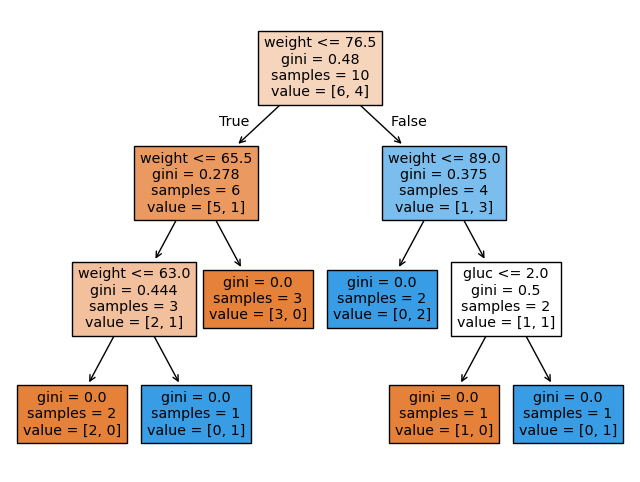

In [10]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=twoFeatures, filled=True);

### 2.3 Посчитайте, сколько вершин получилось

In [11]:
n_nodes = tree.tree_.node_count
n_nodes

11

### 2.4 Посчитайте, сколько листов получилось

In [12]:
n_leaves = tree.tree_.n_leaves
n_leaves

6

### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [13]:
# Ваш код/вывод здесь


## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [14]:
import numpy as np

def gini_index(target_values):
    # Проверка на пустой список
    if len(target_values) == 0:
        return 0.0

    # Подсчет частоты каждого класса
    unique_values, counts = np.unique(target_values, return_counts=True)
    probabilities = counts / len(target_values)

    # Расчет критерия Джини
    gini = 1.0 - np.sum(probabilities ** 2)

    return gini

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [15]:
gini_index_root = gini_index(df[target])

gini_index_root

0.48

### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [16]:
def information_gain(left_target, right_target, parent_target):
    # Проверка на пустые подвыборки
    if len(left_target) == 0 or len(right_target) == 0:
        return 0.0

    # Расчет критерия Джини для исходной вершины
    parent_gini = gini_index(parent_target)

    # Расчет критерия Джини для левой и правой подвыборок
    left_gini = gini_index(left_target)
    right_gini = gini_index(right_target)

    # Расчет взвешенной суммы критериев Джини подвыборок
    total_samples = len(parent_target)
    left_weight = len(left_target) / total_samples
    right_weight = len(right_target) / total_samples

    weighted_gini = left_weight * left_gini + right_weight * right_gini

    # Расчет прироста информации
    gain = parent_gini - weighted_gini

    return gain

In [17]:
split_value = df['weight'].mean()

left_mask = df['weight'] < split_value
right_mask = df['weight'] >= split_value

parent_target = y.values
left_target = y[left_mask].values
right_target = y[right_mask].values

info_gain = information_gain(left_target, right_target, parent_target)
info_gain

0.16333333333333333

In [18]:
parent_target = y.values  # Исходные целевые значения
left_target = y.values[:5]  # Пример левой подвыборки
right_target = y.values[5:]  # Пример правой подвыборки

print(f"Прирост информации: {information_gain(left_target, right_target, parent_target)}")

Прирост информации: 0.08000000000000007


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [19]:
def get_all_questions_and_gains(df, features, target):
    questions_and_gains = []

    for feature in features:
        unique_values = df[feature].unique()
        for value in unique_values:
            left_mask = df[feature] < value
            right_mask = df[feature] >= value

            left_target = df[target][left_mask].values
            right_target = df[target][right_mask].values
            parent_target = df[target].values

            gain = information_gain(left_target, right_target, parent_target)

            questions_and_gains.append({
                'feature': feature,
                'value': value,
                'gain': gain
            })

    return pd.DataFrame(questions_and_gains)

questions_and_gains_df = get_all_questions_and_gains(df, twoFeatures, target)

questions_and_gains_df

,feature,value,gain
0,weight,62.0,0.035556
1,weight,85.0,0.060952
2,weight,64.0,0.080000
3,weight,82.0,0.163333
4,weight,56.0,0.000000
5,weight,67.0,0.003810
6,weight,93.0,0.005000
7,weight,95.0,0.080000
8,weight,71.0,0.080000
9,weight,68.0,0.030000


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [20]:
best_question = questions_and_gains_df.loc[questions_and_gains_df['gain'].idxmax()]

print(f'Лучший вопрос: Признак = {best_question["feature"]}, Значение = {best_question["value"]}, Прирост информации = {best_question["gain"]:.4f}')


Лучший вопрос: Признак = weight, Значение = 82.0, Прирост информации = 0.1633


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [21]:
best_feature = best_question['feature']
best_value = best_question['value']

df_left = df[df[best_feature] < best_value]
df_right = df[df[best_feature] >= best_value]

display(df_left, df_right)

,weight,gluc,cardio
0,62.0,1,0
2,64.0,1,1
4,56.0,1,0
5,67.0,2,0
8,71.0,1,0
9,68.0,1,0


,weight,gluc,cardio
1,85.0,1,1
3,82.0,1,1
6,93.0,1,0
7,95.0,3,1


4.1.4. Проверьте себя через визуализацию дерева решений

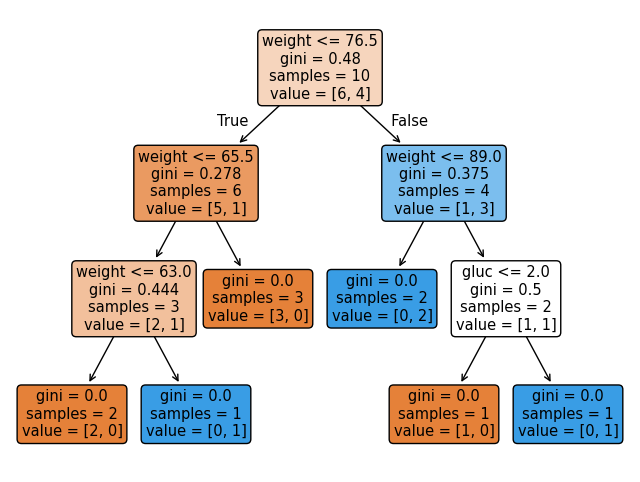

In [22]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=twoFeatures,  filled=True, rounded=True)
plt.show()

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [23]:
# Ваш вывод здесь
# left: weight <= 64, right: weight <=85

4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [24]:
def find_best_split(X, y):
    best_feature = None
    best_value = None
    best_gini = 1.0

    for feature in X.columns:
        unique_values = np.unique(X[feature])
        for value in unique_values:
            left_mask = X[feature] < value
            right_mask = X[feature] >= value

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            gini_left = gini_index(y[left_mask])
            gini_right = gini_index(y[right_mask])

            gini = (np.sum(left_mask) * gini_left + np.sum(right_mask) * gini_right) / len(y)

            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_value = value

    return best_feature, best_value, best_gini

In [25]:
# Лучший признак и значение для первого разбиения
best_feature = 'weight'
best_value = 82.0

# Разбиение данных на две подвыборки
df_left = df[df[best_feature] < best_value]
df_right = df[df[best_feature] >= best_value]

# Поиск лучшего разбиения для df_left
best_feature_left, best_value_left, best_gini_left = find_best_split(df_left.drop('cardio', axis=1), df_left['cardio'])

# Поиск лучшего разбиения для df_right
best_feature_right, best_value_right, best_gini_right = find_best_split(df_right.drop('cardio', axis=1), df_right['cardio'])

# Вывод результатов
print("Лучший признак и значение для df_left:")
print(f"Признак: {best_feature_left}, Значение: {best_value_left}, Индекс Джини: {best_gini_left}")

print("\nЛучший признак и значение для df_right:")
print(f"Признак: {best_feature_right}, Значение: {best_value_right}, Индекс Джини: {best_gini_right}")

Лучший признак и значение для df_left:
Признак: weight, Значение: 67.0, Индекс Джини: 0.2222222222222222

Лучший признак и значение для df_right:
Признак: weight, Значение: 93.0, Индекс Джини: 0.25


4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [26]:
def find_best_split_with_info_gain(X, y):
    """Поиск лучшего признака и значения для разбиения с использованием прироста информации."""
    best_feature = None
    best_value = None
    best_info_gain = 0.0

    for feature in X.columns:
        unique_values = np.unique(X[feature])
        for value in unique_values:
            left_mask = X[feature] < value
            right_mask = X[feature] >= value

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            info_gain = information_gain(y[left_mask], y[right_mask], y)

            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature
                best_value = value

    return best_feature, best_value, best_info_gain

In [27]:
# Лучший признак и значение для первого разбиения
best_feature = 'weight'
best_value = 82.0

# Разбиение данных на две подвыборки
df_left = df[df[best_feature] < best_value]
df_right = df[df[best_feature] >= best_value]

# Поиск лучшего разбиения для df_left
best_feature_left, best_value_left, best_info_gain_left = find_best_split_with_info_gain(df_left.drop('cardio', axis=1), df_left['cardio'])

# Поиск лучшего разбиения для df_right
best_feature_right, best_value_right, best_info_gain_right = find_best_split_with_info_gain(df_right.drop('cardio', axis=1), df_right['cardio'])

# Вывод результатов
print("Лучший признак и значение для df_left:")
print(f"Признак: {best_feature_left}, Значение: {best_value_left}, Прирост информации: {best_info_gain_left}")

print("\nЛучший признак и значение для df_right:")
print(f"Признак: {best_feature_right}, Значение: {best_value_right}, Прирост информации: {best_info_gain_right}")

Лучший признак и значение для df_left:
Признак: weight, Значение: 67.0, Прирост информации: 0.05555555555555547

Лучший признак и значение для df_right:
Признак: weight, Значение: 93.0, Прирост информации: 0.125


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [28]:
df_left_left = df_left[df_left[best_feature_left] < best_value_left]
df_left_right = df_left[df_left[best_feature_left] >= best_value_left]

# Разбиение df_right на основе найденного признака и значения
df_right_left = df_right[df_right[best_feature_right] < best_value_right]
df_right_right = df_right[df_right[best_feature_right] >= best_value_right]

display(df_left_left, df_left_right)
display(df_right_left, df_right_right)

,weight,gluc,cardio
0,62.0,1,0
2,64.0,1,1
4,56.0,1,0


,weight,gluc,cardio
5,67.0,2,0
8,71.0,1,0
9,68.0,1,0


,weight,gluc,cardio
1,85.0,1,1
3,82.0,1,1


,weight,gluc,cardio
6,93.0,1,0
7,95.0,3,1


4.2.5. Проверьте себя через визуализацию дерева решений

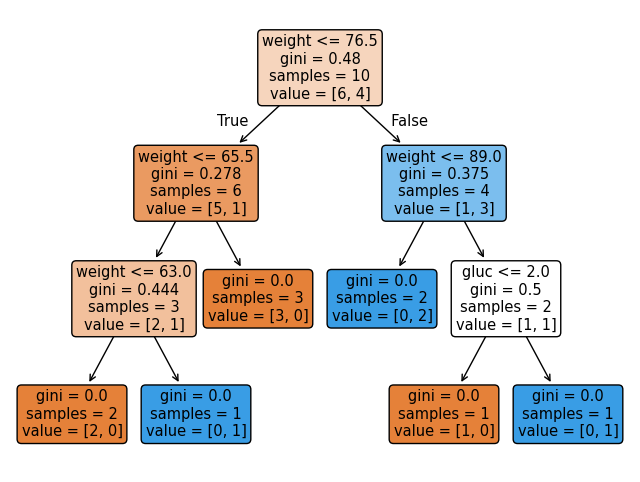

In [29]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=twoFeatures,  filled=True, rounded=True)
plt.show()


4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

Всё сошлось

# 2. Дерево решений для регрессии

In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [31]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [32]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [33]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
# Предсказания на обучающей выборке
y_train_pred = tree.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 0.0
R²: 1.0

Метрики качества на тестовой выборке:
MSE: 5897.134831460674
R²: -0.08909766517566808


Сделайте вывод, насколько хорошо обучилась модель

На обучающей выборке модель показывает идеальные результаты: MSE = 0.0 и R² = 1.0. Это означает, что модель идеально подстроилась под обучающие данные.

На тестовой выборке MSE значительно выше (5897.13), а R² отрицательный (-0.089). Отрицательный R² указывает на то, что модель работает хуже, чем простое среднее значение целевой переменной.

### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [37]:
tree_2 = DecisionTreeRegressor(
    max_depth=5,           # Ограничение глубины дерева
    min_samples_leaf=5,    # Минимальное количество образцов в листе
    min_samples_split=10,  # Минимальное количество образцов для разделения узла
    random_state=1
)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=1)

In [38]:
# Предсказания на обучающей выборке
y_train_pred = tree_2.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree_2.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 2080.3709092112595
R²: 0.6561152723005341

Метрики качества на тестовой выборке:
MSE: 4472.929014695939
R²: 0.17392824047144484


In [39]:
tree_3 = DecisionTreeRegressor(random_state=1,
                               max_depth=8,
                               max_leaf_nodes=20,
                               min_samples_leaf=5)
tree_3.fit(X_train, y_train)

# Предсказания на обучающей выборке
y_train_pred = tree_3.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree_3.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 2084.2344850075665
R²: 0.6554766243052288

Метрики качества на тестовой выборке:
MSE: 3759.244073592346
R²: 0.30573336706958176


In [40]:
tree_4 = DecisionTreeRegressor(random_state=1,
                               max_depth=5,
                               max_leaf_nodes=15,
                               min_samples_leaf=10)
tree_4.fit(X_train, y_train)

# Предсказания на обучающей выборке
y_train_pred = tree_4.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree_4.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 2496.6590989715573
R²: 0.5873029513118222

Метрики качества на тестовой выборке:
MSE: 3546.426633168216
R²: 0.34503702623607435


In [41]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [5, 10, 20]
}

# Создание модели
tree = DecisionTreeRegressor(random_state=1)

# Поиск оптимальных параметров с помощью GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Предсказания на тестовой выборке с использованием лучших параметров
y_test_pred = grid_search.predict(X_test)

# Расчет метрик качества
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nМетрики качества на тестовой выборке с лучшими параметрами:")
print("MSE:", mse_test)
print("R²:", r2_test)

Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}

Метрики качества на тестовой выборке с лучшими параметрами:
MSE: 3292.1949492509716
R²: 0.3919891718595394


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [42]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [43]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [46]:
# Предсказания на обучающей выборке
y_train_pred = tree.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 0.0
R²: 1.0

Метрики качества на тестовой выборке:
MSE: 16649.860589567856
R²: 0.6916004851223545


Сделайте вывод, насколько хорошо обучилась модель

Немного лучше чем в прошлый раз, но всё еще есть проблема с переобучением

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [64]:
tree_params = {"max_depth": range(1, 4), "max_features": range(4, 8), "min_samples_leaf": range(1, 3), "max_leaf_nodes": range(2, 4)}

In [65]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [66]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 4), 'max_features': range(4, 8),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(1, 3)},
             verbose=True)

In [67]:
tree_grid.best_params_

{'max_depth': 2, 'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 1}

In [68]:
tree_grid.best_score_

0.1564798683767663

In [69]:
tree_2 = DecisionTreeRegressor(random_state=1,
                               max_depth=7,
                               max_leaf_nodes=10)
tree_2.fit(X_train, y_train)

# Предсказания на обучающей выборке
y_train_pred = tree_2.predict(X_train)

# Предсказания на тестовой выборке
y_test_pred = tree_2.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Расчет коэффициента детерминации (R²)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Метрики качества на обучающей выборке:")
print("MSE:", mse_train)
print("R²:", r2_train)

print("\nМетрики качества на тестовой выборке:")
print("MSE:", mse_test)
print("R²:", r2_test)

Метрики качества на обучающей выборке:
MSE: 35732.292138281024
R²: 0.3388677391293302

Метрики качества на тестовой выборке:
MSE: 35985.30057567083
R²: 0.33345692712786945
